# Vision Transformers, CLIP, Diffusion Models

–ù–∞ —ç—Ç–æ–º –∑–∞–Ω—è—Ç–∏–∏ –º—ã –ø–æ–∑–Ω–∞–∫–æ–º–∏–º—Å—è —Å–æ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–æ–π Vision Transformer –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ –∫–∞—Ä—Ç–∏–Ω–æ–∫, —Å –Ω–µ–π—Ä–æ—Å–µ—Ç—å—é CLIP, –∞ —Ç–∞–∫–∂–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –¥–∏—Ñ—Ñ—É–∑–∏–æ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –∫–∞—Ä—Ç–∏–Ω–æ–∫.

# –ó–∞–¥–∞—á–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∫–∞—Ä—Ç–∏–Ω–æ–∫

–ú—ã –±—É–¥–µ–º –ø—Ä–∏–º–µ–Ω—è—Ç—å ViT –∏ CLIP –Ω–∞ –∑–∞–¥–∞—á—É –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∫–∞—Ä—Ç–∏–Ω–æ–∫. –ú—ã –±—É–¥–µ–º —Ä–∞–±–æ—Ç–∞—Ç—å —Å –¥–∞—Ç–∞—Å–µ—Ç–æ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –ø—Ä–∏—Ä–æ–¥—ã:

<center><img src="https://drive.google.com/uc?export=view&id=107CFSNUCb0NkXsjZcBmIDwwfAUf4KtaW" width=500 />

<i>–î–∞—Ç–∞—Å–µ—Ç –≤–∑—è—Ç –æ—Ç—Å—é–¥–∞: [Kaggle Scene Classification dataset](https://www.kaggle.com/datasets/nitishabharathi/scene-classification)</i>

</center>



## –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from PIL import Image
import os

import torch

# checking availability of GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
# library for downloading from google drive
! pip install gdown

# download this file by it's id:
# https://drive.google.com/file/d/1ez8ZDk94GtjxnN-D58CBF8flKuold0ZA/view?usp=drive_link
! gdown --id 1ez8ZDk94GtjxnN-D58CBF8flKuold0ZA -O scenes-tiny.zip

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ez8ZDk94GtjxnN-D58CBF8flKuold0ZA
To: /content/scenes-tiny.zip
100% 9.53M/9.53M [00:00<00:00, 64.7MB/s]


In [ ]:
! unzip -qq scenes-tiny.zip

replace scenes-tiny/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

–ü–æ—Å–ª–µ –∑–∞–ø—É—Å–∫–∞ –∫–æ–¥–∞ –≤—ã—à–µ —É –≤–∞—Å –¥–æ–ª–∂–Ω–∞ –ø–æ—è–≤–∏—Ç—å—Å—è –ø–∞–ø–∫–∞ —Å –∏–º–µ–Ω–µ–º "scenes-tiny" (–µ—Å–ª–∏ –≤—ã —Ä–∞–±–æ—Ç–∞–µ—Ç–µ –≤ Google Colab, –æ–Ω–∞ –ø–æ—è–≤–∏—Ç—Å—è –Ω–∞ –≤–∫–ª–∞–¥–∫–µ "–§–∞–π–ª—ã"). –≠—Ç–∞ –ø–∞–ø–∫–∞ —Å–æ–¥–µ—Ä–∂–∏—Ç –≤—Å–µ –¥–∞–Ω–Ω—ã–µ –≤ —Ñ–æ—Ä–º–∞—Ç–µ, —Å–æ–≤–º–µ—Å—Ç–∏–º–æ–º —Å –±–∏–±–ª–∏–æ—Ç–µ–∫–∞–º–∏ HuggingFace.

–î–∞–Ω–Ω—ã–µ –ø–æ–¥–µ–ª–µ–Ω—ã –Ω–∞ —Ç—Ä–∏ —á–∞—Å—Ç–∏: train, val –∏ test. –ö–∞–∂–¥–∞—è —á–∞—Å—Ç—å –∏–º–µ–µ—Ç —Å–ª–µ–¥—É—é—â—É—é —Å—Ç—Ä—É–∫—Ç—É—Ä—É:

<br/>

```
scenes-small/train
        |-- Building/
        |---- 7262.jpg
        |---- 7267.jpg
        ...
        |-- Forest/
        |---- 6805.jpg
        |---- 6812.jpg
        ...
        |-- Street/
        |---- 6158.jpg
        |---- 6160.jpg
        ...
```

–ó–∞–≥—Ä—É–∑–∏–º –¥–∞—Ç–∞—Å–µ—Ç, –∏—Å–ø–æ–ª—å–∑—É—è —Ñ—É–Ω–∫—Ü–∏—é `load_dataset` –∏–∑ Hugging Face:

In [ ]:
! pip install -qq transformers[torch] datasets

In [ ]:
from datasets import load_dataset

dataset = load_dataset("imagefolder", data_dir="./scenes-tiny")

Resolving data files:   0%|          | 0/300 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/150 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/150 [00:00<?, ?it/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 300
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 150
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 150
    })
})

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø—Ä–∏–º–µ—Ä –∫–∞—Ä—Ç–∏–Ω–∫–∏ –∏ –µ–µ –ª–µ–π–±–ª:

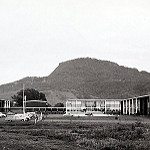

In [ ]:
# –Ω–æ–º–µ—Ä –∫–∞—Ä—Ç–∏–Ω–∫–∏ –¥–ª—è –≤—ã–≤–æ–¥–∞
num_image = 0
image = dataset['train'][num_image]['image']
image

In [ ]:
label = dataset['train'][num_image]['label']
label

0

–ó–∞–ø–∏—à–µ–º —Ç–∞–∫–∂–µ –Ω–∞–∑–≤–∞–Ω–∏—è –∫–ª–∞—Å—Å–æ–≤ –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é `class_names`:

In [ ]:
class_names = dataset['train'].features['label'].names
class_names

['Building', 'Forest', 'Glacier', 'Mountain', 'Sea', 'Street']

In [ ]:
label = dataset['train'][num_image]['label']
class_names[label]

'Building'

–ù–∞–ø–∏—à–µ–º —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –≤—ã–≤–æ–¥–∏—Ç –Ω–µ—Å–∫–æ–ª—å–∫–æ –∫–∞—Ä—Ç–∏–Ω–æ–∫ –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞:

In [ ]:
def show_random_images(data):

    f, axes_grid = plt.subplots(4, 4, figsize=(7, 7))

    # –ø–µ—Ä–µ–º–µ—à–∏–≤–∞–µ–º –∏–Ω–¥–µ–∫—Å—ã –∫–∞—Ä—Ç–∏–Ω–æ–∫
    image_indices = list(range(len(data)))
    np.random.shuffle(image_indices)

    i = 0
    for axes_row in axes_grid:
        for ax in axes_row:
            img = data[image_indices[i]]['image']
            label = data[image_indices[i]]['label']

            # –≤—ã–≤–æ–¥–∏–º –∫–∞—Ä—Ç–∏–Ω–∫—É
            ax.imshow(img)
            # –≤—ã–≤–æ–¥–∏–º –Ω–∞–∑–≤–∞–Ω–∏–µ –∫–ª–∞—Å—Å–∞ –∫–∞—Ä—Ç–∏–Ω–∫–∏
            ax.set_title(class_names[label])
            # —É–±–µ—Ä–µ–º –æ—Ç—Ä–∏—Å–æ–≤–∫—É –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

            i += 1

    plt.show()

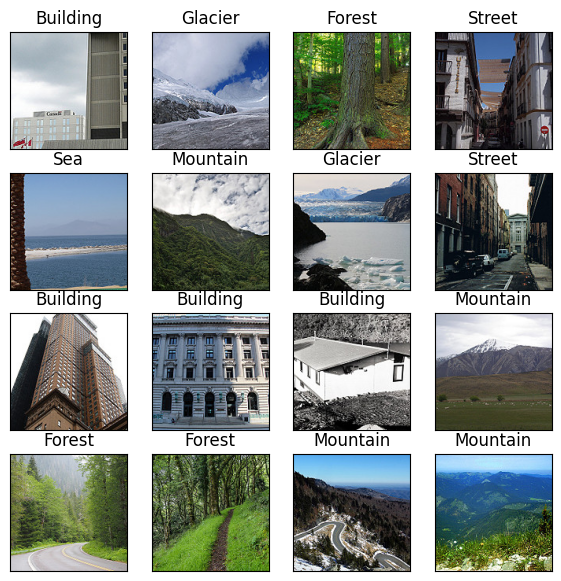

In [ ]:
show_random_images(dataset['train'])

## –ü–ª–∞–Ω —Ä–∞–±–æ—Ç—ã

–ú—ã —Ä–µ—à–∏–º –∑–∞–¥–∞—á—É –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∫–∞—Ä—Ç–∏–Ω–æ–∫ —Å –ø–æ–º–æ—â—å—é —Ç—Ä–µ—Ö –ø–æ–¥—Ö–æ–¥–æ–≤:

1. –û–±—É—á–µ–Ω–∏–µ ViT –Ω–∞ –Ω–∞—à—É –∑–∞–¥–∞—á—É –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å –Ω—É–ª—è
2. –î–æ–æ–±—É—á–µ–Ω–∏–µ ViT –Ω–∞ –Ω–∞—à—É –∑–∞–¥–∞—á—É –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
3. –ò—Å–ø–æ–ª—å–∑—É—è **CLIP** –≤ —Ä–µ–∂–∏–º–µ **zero-shot learning**

<center><img src="https://drive.google.com/uc?export=view&id=13cyi2StlJ9EUXQURJ8ueWGw0JTEGr9Oz" width=400 /></center>

# Vision Transformer

## –ö–∞–∫ —É—Å—Ç—Ä–æ–µ–Ω Vision Transformer

–î–ª—è –Ω–∞—à–µ–≥–æ –ø–µ—Ä–≤–æ–≥–æ –ø–æ–¥—Ö–æ–¥–∞ –º—ã –æ–±—É—á–∏–º –º–æ–¥–µ–ª—å **Vision Transformer (ViT)** –Ω–∞ –Ω–∞—à–µ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π —Å –Ω—É–ª—è.

–°–Ω–∞—á–∞–ª–∞ —É–¥–µ–ª–∏–º –Ω–µ–º–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ —Ç–æ–º—É, —á—Ç–æ–±—ã –ø–æ–Ω—è—Ç—å, –∫–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç ViT. –ü–æ —Å—É—Ç–∏, –æ–Ω –¥–µ–ª–∞–µ—Ç —Ç–æ, —á—Ç–æ —Å–ª–µ–¥—É–µ—Ç –∏–∑ –µ–≥–æ –Ω–∞–∑–≤–∞–Ω–∏—è, –∏ –ø—Ä–∏–º–µ–Ω—è–µ—Ç –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—É **Transformer** –∫ –∑–∞–¥–∞—á–∞–º –∫–æ–º–ø—å—é—Ç–µ—Ä–Ω–æ–≥–æ –∑—Ä–µ–Ω–∏—è:

1. –ò–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ —Ä–∞–∑–±–∏–≤–∞–µ—Ç—Å—è –Ω–∞ –Ω–µ–±–æ–ª—å—à–∏–µ **–ø–∞—Ç—á–∏**, –∫–æ—Ç–æ—Ä—ã–µ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—é—Ç—Å—è –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—è–º **—Ç–æ–∫–µ–Ω–æ–≤** –≤ —Ç–µ–∫—Å—Ç–∞—Ö
2. –ü–∞—Ç—á–∏ **–ø—Ä–æ–µ—Ü–∏—Ä—É—é—Ç—Å—è** –≤ –≤–µ–∫—Ç–æ—Ä—ã –≤–º–µ—Å—Ç–µ —Å positional encodings
3. –¢–æ–∫–µ–Ω—ã –ø—Ä–æ—Ö–æ–¥—è—Ç —á–µ—Ä–µ–∑ **Transformer Encoder** (–Ω–µ—Å–∫–æ–ª—å–∫–æ —Å–ª–æ–µ–≤), –∞–Ω–∞–ª–æ–≥–∏—á–Ω—ã–π —Ç–æ–º—É, –∫–æ—Ç–æ—Ä—ã–π –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –≤ BERT –∏ GPT
4. –ò—Ç–æ–≥–æ–≤—ã–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –ø—Ä–æ—Ö–æ–¥—è—Ç —á–µ—Ä–µ–∑ —Å–ª–æ–π **–øMLP** –∏ —Ñ—É–Ω–∫—Ü–∏—é **softmax**, –∫–æ—Ç–æ—Ä–æ–µ –≤—ã–¥–∞–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π –Ω–∞ –∫–ª–∞—Å—Å—ã.

<center><img src="https://drive.google.com/uc?export=view&id=1tEV7RnAJdlRD-DMW0nXrFaQ4DP1QHNTR" width=800 />

</center>

## –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

–ú—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–æ–¥–µ–ª—å ViT –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ transformers

In [ ]:
from transformers import ViTConfig, ViTForImageClassification

In [ ]:
# –∏—Å–ø–æ–ª—å–∑—É–µ–º –¥–µ—Ñ–æ–ª—Ç–Ω—ã–π –∫–æ–Ω—Ñ–∏–≥
configuration = ViTConfig()
# –º–µ–Ω—è–µ–º —á–∏—Å–ª–æ –∫–ª–∞—Å—Å–æ–≤
configuration.num_labels = len(class_names)

# —Å–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª—å
model = ViTForImageClassification(configuration).to(device)

–î–ª—è –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ –∫–∞—Ä—Ç–∏–Ω–æ–∫ –∏—Å–ø–æ–ª—å–∑—É–µ–º ViTImageProcessor:

In [ ]:
from transformers import ViTImageProcessor

image_processor = ViTImageProcessor()

–ù–∞–ø–∏—à–µ–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ –±–∞—Ç—á–µ–π –¥–∞–Ω–Ω—ã—Ö:

In [ ]:
def transform(dataset):

    """
    –§—É–Ω–∫—Ü–∏—è –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ –¥–∞–Ω–Ω—ã–µ –≤–∏–¥–∞:
    {
        'image': [list of images],
        'label': [list of labels]
    }
    –∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ—Ç –∫–∞—Ä—Ç–∏–Ω–∫–∏, –∏—Å–ø–æ–ª—å–∑—É—è image_processor.
    """

    transformed_dataset = image_processor(dataset['image'])

    transformed_dataset['label'] = dataset['label']

    return transformed_dataset

# –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–µ–º –∫–∞—Ä—Ç–∏–Ω–∫–∏ –¥–∞—Ç–∞—Å–µ—Ç–∞
transformed_dataset = dataset.with_transform(transform)

–û–ø—Ä–µ–¥–µ–ª–∏–º —Ç–∞–∫–∂–µ —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –º–µ—Ç—Ä–∏–∫–∏, –∫–æ—Ç–æ—Ä—É—é –º—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å (accuracy):

In [ ]:
! pip install evaluate

In [ ]:
import evaluate

def compute_metrics(eval_pred):
    accuracy = evaluate.load("accuracy", trust_remote_code=True)

    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy.compute(predictions=predictions, references=labels)["accuracy"]
    return {"accuracy": acc}

## –ó–∞–¥–∞–Ω–∏–µ 1 (20 –±–∞–ª–ª–æ–≤)

–í–∞—à–∞ –∑–∞–¥–∞—á–∞ ‚Äî –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å –∏ –¥–æ—Å—Ç–∏—á—å —Ç–æ—á–Ω–æ—Å—Ç–∏ –Ω–µ –º–µ–Ω–µ–µ 50%. –ö–æ–¥ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –∏ —Ç–µ—Å—Ç–∞ –Ω–∞–ø–∏—Å–∞–Ω –Ω–∏–∂–µ, –≤–∞–º –Ω—É–∂–Ω–æ –ø–æ–¥–æ–±—Ä–∞—Ç—å  –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –æ–±—É—á–µ–Ω–∏—è.

Hint: –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å –Ω—É–∂–Ω—ã–º–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –Ω–µ –¥–æ–ª–∂–Ω–æ –∑–∞–Ω–∏–º–∞—Ç—å –±–æ–ª–µ–µ 10 –º–∏–Ω—É—Ç

–ß—Ç–æ –º–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å:
1. –ò–∑–º–µ–Ω–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–µ–≤ –∏–ª–∏ –≥–æ–ª–æ–≤ –≤–Ω–∏–º–∞–Ω–∏—è –≤ –º–æ–¥–µ–ª–∏, –æ—Ç—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞–≤ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã `num_attention_heads` –∏ `num_hidden_layers` –≤ –∫–æ–Ω—Ñ–∏–≥–µ. –ó–¥–µ—Å—å –º–æ–∂–Ω–æ —Ä—É–∫–æ–≤–æ–¥—Å—Ç–≤–æ–≤–∞—Ç—å—Å—è –∑–¥—Ä–∞–≤—ã–º —Å–º—ã—Å–ª–æ–º: –µ—Å–ª–∏ –º–æ–¥–µ–ª—å –ª–µ–≥–∫–æ –ø–µ—Ä–µ–æ–±—É—á–∞–µ—Ç—Å—è, –ø–æ–ø—Ä–æ–±—É–π—Ç–µ —É–º–µ–Ω—å—à–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤; –µ—Å–ª–∏ –º–æ–¥–µ–ª—å –Ω–µ–¥–æ–æ–±—É—á–∞–µ—Ç—Å—è, –ø–æ–ø—Ä–æ–±—É–π—Ç–µ —É–≤–µ–ª–∏—á–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.
2. –ü–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –∏–∑–º–µ–Ω–∏—Ç—å —Ä–∞–∑–º–µ—Ä –≤—Ö–æ–¥–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π.
3. –ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö. –í–æ—Ç –µ—à–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Å—Å—ã–ª–æ–∫ –ø—Ä–æ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—é:
- https://albumentations.ai/docs/introduction/image_augmentation/
- [–î–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏—è PyTorch](https://pytorch.org/vision/main/transforms.html)
- [–ò–ª–ª—é—Å—Ç—Ä–∞—Ü–∏—è –º–µ—Ç–æ–¥–æ–≤ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –≤ PyTorch](https://pytorch.org/vision/main/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py)
–ß—Ç–æ–±—ã –¥–æ–±–∞–≤–∏—Ç—å –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—é –∫ –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏, –≤–∞–º –Ω—É–∂–Ω–æ –±—É–¥–µ—Ç –¥–æ–±–∞–≤–∏—Ç—å –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –≤ —Ñ—É–Ω–∫—Ü–∏—é ¬´transform¬ª. –ü—Ä–∏–º–µ—Ä —Ç–æ–≥–æ, –∫–∞–∫ —ç—Ç–æ —Å–¥–µ–ª–∞—Ç—å, –º–æ–∂–Ω–æ –Ω–∞–π—Ç–∏ [–∑–¥–µ—Å—å](https://github.com/NielsRogge/Transformers-Tutorials/blob/master/VisionTransformer/Fine_tuning_the_Vision_Transformer_on_CIFAR_10_with_PyTorch_Lightning.ipynb)

</details>

In [ ]:
# edit the code below

from transformers import TrainingArguments, Trainer

# re-run the model creation for multiple experiments
model = ViTForImageClassification(configuration).to(device)

training_args = TrainingArguments(
    output_dir="./output",
    overwrite_output_dir=True,
    per_device_train_batch_size=64,
    evaluation_strategy="steps",
    logging_steps=10,
    eval_steps=10,
    remove_unused_columns=False, # utility argument for easier data processing

    learning_rate=0.05,
    num_train_epochs=5,
)

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=transformed_dataset["train"],
    eval_dataset=transformed_dataset["validation"],
)

train_results = trainer.train()
trainer.save_model()
print()

metrics = trainer.evaluate(transformed_dataset['train'])
trainer.log_metrics("train", metrics)

metrics = trainer.evaluate(transformed_dataset['test'])
trainer.log_metrics("test", metrics)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


***** train metrics *****
  epoch                   =        5.0
  eval_accuracy           =     0.1667
  eval_loss               =     2.6468
  eval_runtime            = 0:00:04.43
  eval_samples_per_second =     67.583
  eval_steps_per_second   =      8.561
***** test metrics *****
  epoch                   =        5.0
  eval_accuracy           =     0.1667
  eval_loss               =     2.6334
  eval_runtime            = 0:00:02.22
  eval_samples_per_second =     67.561
  eval_steps_per_second   =      8.558


–ú—ã –ø–æ–ª—É—á–∏–ª–∏ –Ω–µ –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç, –∏ —Å–µ—Ç—å —É–∂–µ –Ω–∞—á–∞–ª–∞ **–ø–µ—Ä–µ–æ–±—É—á–∞—Ç—å—Å—è**. –≠—Ç–æ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –∏–∑-–∑–∞ —Ç–æ–≥–æ, —á—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–∞–Ω–Ω—ã—Ö —É –Ω–∞—Å —Å–æ–≤–µ–º –Ω–µ–±–æ–ª—å—à–æ–µ. –î–∞–ª–µ–µ –º—ã –ø—Ä–∏–º–µ–Ω–∏–º Transfer Learning, —á—Ç–æ–±—ã —Å–∏—Ç—É–∞—Ü–∏—è —Å—Ç–∞–ª–∞ –ª—É—á—à–µ.

## Transfer Learning

–ù–∞–ø–æ–º–∏–Ω–∞–Ω–∏–µ, –∫–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç Transfer Learning:

1. –°–Ω–∞—á–∞–ª–∞ –º–æ–¥–µ–ª—å **–ø—Ä–µ–¥–æ–±—É—á–∞–µ—Ç—Å—è** –Ω–∞ –±–æ–ª—å—à–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –∫–∞—Ä—Ç–∏–Ω–æ–∫
2. –ó–∞—Ç–µ–º –º–æ–¥–µ–ª—å **–¥–æ–æ–±—É—á–∞–µ—Ç—Å—è** –Ω–∞ –º–µ–Ω—å—à–µ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –¥–ª—è –Ω—É–∂–Ω–æ–π –∑–∞–¥–∞—á–∏.


<center><img src="https://drive.google.com/uc?export=view&id=1Q-2iVC26O2AwsWrrI1mnkar0H1OfHaCB" width=1000 /></center>

–í –∫–∞—á–µ—Å—Ç–≤–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ –¥–ª—è –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–∏—è –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å ImageNet:

<center><img src="https://drive.google.com/uc?export=view&id=1xP5LNXf8lgQWhjB1uH4qpsQ22CMwZEbz" width=600 /></center>

–ó–∞–≥—Ä—É–∑–∏–º ViT, –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—ã–π –Ω–∞ ImageNet, –∏–∑ HuggingFace:

In [ ]:
from transformers import ViTForImageClassification

model_name = 'google/vit-base-patch16-224-in21k'

# we need to pass an amount of classes in our dataset to
# ViTForImageClassification so that our model is build
# for the specified number of classes
model = ViTForImageClassification.from_pretrained(
    model_name,
    num_labels=len(class_names)
)

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


 –ù—É–∂–Ω–æ –Ω–µ –∑–∞–±—ã—Ç—å –ø–µ—Ä–µ–æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π. –ù–∞–ø–æ–º–Ω–∏–º, —á—Ç–æ –ª—É—á—à–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ç—É –∂–µ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É, –∫–æ—Ç–æ—Ä–∞—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∞—Å—å –¥–ª—è –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ –≤ ImageNet.

In [ ]:
from transformers import ViTFeatureExtractor

# –∑–∞–≥—Ä—É–∂–∞–µ–º processor –¥–ª—è –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ –∏–∑–æ–±—Ä–∞–∂–Ω–∏–π
image_processor = ViTFeatureExtractor.from_pretrained(model_name)

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


–û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ –≤—Å–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞:

In [ ]:
def transform(dataset):
    '''
    A function that takes a batch of data a of a format
    {
        'image': [list of images],
        'label': [list of labels]
    }
    and transforms all the images in it using image_processor
    '''

    transformed_dataset = image_processor(dataset['image'])
    transformed_dataset['label'] = dataset['label']
    return transformed_dataset


transformed_dataset = dataset.with_transform(transform)

## –ó–∞–¥–∞–Ω–∏–µ 2 (20 –±–∞–ª–ª–æ–≤)

–î–æ–æ–±—É—á–∏—Ç–µ –º–æ–¥–µ–ª—å! –ó–¥–µ—Å—å –≤–∞—à–∞ –∑–∞–¥–∞—á–∞ ‚Äî –¥–æ–±–∏—Ç—å—Å—è 90% accuracy –Ω–∞ —Ç–µ—Å—Ç–µ, –æ–±—É—á–∞—è –º–æ–¥–µ–ª—å –Ω–µ –±–æ–ª–µ–µ —á–µ–º 5 —ç–ø–æ—Ö.

**–ë–æ–Ω—É—Å (10 –±–∞–ª–ª–æ–≤).** –ü–æ–ø—Ä–æ–±—É–π—Ç–µ –ø–æ–ª—É—á–∏—Ç—å 90% accuracy –Ω–∞ —Ç–µ—Å—Ç–µ, –æ–±—É—á–∞—è –º–æ–¥–µ–ª—å –∑–∞ 2 —ç–ø–æ—Ö–∏.

In [ ]:
from transformers import TrainingArguments, Trainer


model = ViTForImageClassification.from_pretrained(
    model_name,
    num_labels=len(class_names))

training_args = TrainingArguments(
    output_dir="./logs",
    evaluation_strategy="steps",
    remove_unused_columns=False,

    # more frequent steps for more information
    logging_steps=5,
    eval_steps=5,

    per_device_train_batch_size=64,
    learning_rate=1e-6,
    num_train_epochs=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    # datasets for training and validating
    train_dataset=transformed_dataset["train"],
    eval_dataset=transformed_dataset["validation"],
)


train_results = trainer.train()
trainer.save_model()
print()

metrics = trainer.evaluate(transformed_dataset['train'])
trainer.log_metrics("train", metrics)
metrics = trainer.evaluate(transformed_dataset['test'])
trainer.log_metrics("test", metrics)

# Classification Using CLIP

–í —ç—Ç–æ–π —á–∞—Ç—Å–∏ –º—ã –∏—Å–ø–æ–ª—å–∑—É–µ–º –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å CLIP –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –Ω–∞—à–µ–π –∑–∞–¥–∞—á–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏. –ù–æ CLIP ‚Äî —ç—Ç–æ –º–æ–¥–µ–ª—å –Ω–µ —Å–æ–≤—Å–µ–º –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π, —Ö–æ—Ç—è –µ–µ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è —ç—Ç–æ–π —Ü–µ–ª–∏. –ü—Ä–µ–∂–¥–µ —á–µ–º –º—ã –Ω–∞—á–Ω–µ–º, –¥–∞–≤–∞–π—Ç–µ –ø–æ–≥–æ–≤–æ—Ä–∏–º –æ —Ç–æ–º, —á—Ç–æ —Ç–∞–∫–æ–µ CLIP.

## –ß—Ç–æ —Ç–∞–∫–æ–µ CLIP

–ú—ã —É–º–µ–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å BERT –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤, –∞ ViT ‚Äî –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –∫–∞—Ä—Ç–∏–Ω–æ–∫. CLIP ‚Äî —ç—Ç–æ –º–æ–¥–µ–ª—å, –∫–æ—Ç–æ—Ä–∞—è —Å–ø–æ—Å–æ–±–Ω–∞ –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –∏ —Ç–æ, –∏ –¥—Ä—É–≥–æ–µ –≤ –æ–±—â–µ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤. –ò–¥–µ—è –≤ —Ç–æ–º, —á—Ç–æ –µ—Å–ª–∏ —Ç–µ–∫—Å—Ç $T$ —è–≤–ª—è–µ—Ç—Å—è —Ö–æ—Ä–æ—à–∏–º –æ–ø–∏—Å–∞–Ω–∏–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è $I$, —Ç–æ –∏—Ö —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –±–ª–∏–∑–∫–∏ –¥—Ä—É–≥ –∫ –¥—Ä—É–≥—É, –∞ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏ —Å–ª—É—á–∞–π–Ω—ã—Ö –Ω–µ —Å–≤—è–∑–∞–Ω–Ω—ã—Ö —Å –Ω–∏–º–∏ —Ç–µ–∫—Å—Ç–æ–≤ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –¥–∞–ª–µ–∫–∏ –¥—Ä—É–≥ –æ—Ç –¥—Ä—É–≥–∞.

CLIP —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ –¥–≤—É—Ö –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç–µ–π:

* **Image Encoder**, –∫–æ—Ç–æ—Ä—ã–π –ø–µ—Ä–µ–≤–æ–¥–∏—Ç –∫–∞—Ä—Ç–∏–Ω–∫—É –≤ —ç–º–±–µ–¥–¥–∏–Ω–≥
* **Text Encoder**, –∫–æ—Ç–æ—Ä—ã–π –ø–µ—Ä–µ–≤–æ–¥–∏—Ç —Ç–µ–∫—Å—Ç –≤ —ç–º–±–µ–¥–¥–∏–Ω–≥

–≠—Ç–∏ –¥–≤–µ —Å–µ—Ç–∏ –æ–±—É—á–∞—é—Ç—Å—è –≤–º–µ—Å—Ç–µ –Ω–∞ –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö –ø–∞—Ä–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏ –∏—Ö –æ–ø–∏—Å–∞–Ω–∏–π $(I_1, T_1), \ldots, (I_N, T_N)$. –û–Ω–∏ –∏—Å–ø–æ–ª—å–∑—É—é—Ç –Ω–µ–æ–±—ã—á–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å, –Ω–∞–∑—ã–≤–∞–µ–º—É—é **contrastive loss**. –ú—ã –∑–¥–µ—Å—å –Ω–µ –±—É–¥–µ–º –≤–¥–∞–≤–∞—Ç—å—Å—è –≤ –ø–æ–¥—Ä–æ–±–Ω–æ—Å—Ç–∏, –Ω–æ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º —ç—Ç–æ —Ä–∞–±–æ—Ç–∞–µ—Ç —Ç–∞–∫: –¥–ª—è –∫–∞–∂–¥–æ–π –ø–∞—Ä—ã –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è $I_i$ –∏ —Ç–µ–∫—Å—Ç–∞ $T_j$:

- –µ—Å–ª–∏ $i=j$, —Ç–æ loss ‚Äî —ç—Ç–æ **—Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ** –º–µ–∂–¥—É –Ω–∏–º–∏ (—á—Ç–æ –∑–∞—Å—Ç–∞–≤–ª—è–µ—Ç –∏—Ö –±—ã—Ç—å –±–ª–∏–∑–∫–æ –¥—Ä—É–≥ –∫ –¥—Ä—É–≥—É)
- –µ—Å–ª–∏ $i \neq j$, —Ç–æ loss ‚Äî —ç—Ç–æ **–æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ** –º–µ–∂–¥—É –Ω–∏–º–∏ (—á—Ç–æ –∑–∞—Å—Ç–∞–≤–ª—è–µ—Ç –∏—Ö –±—ã—Ç—å –¥–∞–ª–µ–∫–æ –¥—Ä—É–≥ –æ—Ç –¥—Ä—É–≥–∞)

–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –º–µ–∂–¥—É —ç–º–±–µ–¥–¥–∏–Ω–≥–∞–º–∏ –≤ —ç—Ç–æ–º –æ–±—â–µ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ —Å—á–∏—Ç–∞–µ—Ç—Å—è —Å –ø–æ–º–æ—â—å—é cosine distance:

$$\text{cosine distance}(\mathbf{A}, \mathbf{B}) = 1 - \text{cosine similarity}(\mathbf{A}, \mathbf{B})$$

–ë–ª–∏–∑–æ—Å—Ç—å —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –≤ —ç—Ç–æ–º –æ–±—â–µ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ —Å—á–∏—Ç–∞–µ—Ç—Å—è —Å –ø–æ–º–æ—â—å—é cosine similarity:

$$\text{cosine similarity}(\mathbf{A}, \mathbf{B}) = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \, \|\mathbf{B}\|} = \frac{\sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_i^2} \, \sqrt{\sum_{i=1}^{n} B_i^2}}$$

<center><img src="https://drive.google.com/uc?export=view&id=1wYwJa2sp4rfscvPd4ZZdf1ETOMipM-_S" width=800 />

</center>

–í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –ø–æ—Å–ª–µ —Ç–∞–∫–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è –º—ã –ø–æ–ª—É—á–∞–µ–º –¥–≤–µ –º–æ–¥–µ–ª–∏ (image encoder –∏ text encoder), –∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–æ–µ—Ü–∏—Ä—É—é—Ç —Å–≤—è–∑–∞–Ω–Ω—ã–π —Ç–µ–∫—Å—Ç –∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –≤ –æ–±—â–µ–µ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤.

## Zero-Shot –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è —Å –ø–æ–º–æ—â—å—é CLIP

–¢–µ–ø–µ—Ä—å –¥–∞–≤–∞–π—Ç–µ –ø–æ–≥–æ–≤–æ—Ä–∏–º –æ —Ç–æ–º, –∫–∞–∫ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å CLIP –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –±–µ–∑ –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –æ–±—É—á–µ–Ω–∏—è. –≠—Ç–æ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è **zero-shot** –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–µ–π, –ø–æ—Ç–æ–º—É —á—Ç–æ –º—ã –Ω–∏–∫–∞–∫ –Ω–µ –æ–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å.

–í—Å–µ –ø—Ä–æ—Å—Ç–æ: –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —É –Ω–∞—Å –µ—Å—Ç—å –∑–∞–¥–∞—á–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π —Å 4 –∫–ª–∞—Å—Å–∞–º–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π: ¬´—Å–∞–º–æ–ª–µ—Ç¬ª, ¬´–º–∞—à–∏–Ω–∞¬ª, ¬´—Å–æ–±–∞–∫–∞¬ª, ¬´–ø—Ç–∏—Ü–∞¬ª. –ö–∞–∫ –º—ã –º–æ–∂–µ–º –ø–æ–Ω—è—Ç—å –¥–ª—è –∑–∞–¥–∞–Ω–Ω–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è $I$, –∫ –∫–∞–∫–æ–º—É –∏–∑ —á–µ—Ç—ã—Ä–µ—Ö –∫–ª–∞—Å—Å–æ–≤ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–∏—Ç —ç—Ç–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ?



–î–∞–≤–∞–π—Ç–µ —Å–¥–µ–ª–∞–µ–º —Å–ª–µ–¥—É—é—â–µ–µ:

- –ü–æ–ª—É—á–∏–º —ç–º–±–µ–¥–¥–∏–Ω–≥ $e_I$ –∫–∞—Ä—Ç–∏–Ω–∫–∏ $I$ —Å –ø–æ–º–æ—â—å—é image encoder
- –ü–æ–¥—Å—Ç–∞–≤–∏–º –Ω–∞–∑–≤–∞–Ω–∏—è –∫–ª–∞—Å—Å–æ–≤ $X$ –≤ —Ç–µ–º–ø–ª–µ–π—Ç—ã –≤–∏–¥–∞ "a photo/picture/image of a X":

    "a photo of a plane"

    "a photo of a car"

    "a photo of a dog"

    "a photo of a bird"

- –ü–æ–ª—É—á–∏–º —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ $e_{plane}, e_{car}, e_{dog}, e_{bird}$ –≤—Å–µ—Ö –æ–ø–∏—Å–∞–Ω–∏–π –∫–ª–∞—Å—Å–æ–≤ –∏–∑ –ø—É–Ω–∫—Ç–∞ –≤—ã—à–µ
- –ü–æ—Å—á–∏—Ç–∞–µ–º –∫–æ—Å–∏–Ω—É—Å–Ω—É—é –±–ª–∏–∑–æ—Å—Ç—å –º–µ–∂–¥—É —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–º –∫–∞—Ä—Ç–∏–Ω–∫–∏ $e_I$ –∏ —ç–º–±–µ–¥–¥–∏–Ω–≥–∞–º–∏ –∫–ª–∞—Å—Å–æ–≤:

    $sim_{I, plane} = e_I \cdot e_{plane}$

    $sim_{I, car} = e_I \cdot e_{car}$

    $sim_{I, dog} = e_I \cdot e_{dog}$

    $sim_{I, bird} = e_I \cdot e_{bird}$

    –∏ –∑–∞—Ç–µ–º –≤—ã–≤–µ–¥–µ–º –≤ –∫–∞—á–µ—Å—Ç–≤–µ –æ—Ç–≤–µ—Ç–∞ –∫–ª–∞—Å—Å, —É –∫–æ—Ç–æ—Ä–æ–≥–æ –Ω–∞–∏–±–æ–ª—å—à (e.g. if $sim_{I, car}$ has the highest value across all four, then we conclude that our image belongs to the "car" class.)


–¢–æ –µ—Å—Ç—å, –∑–¥–µ—Å—å –º—ã –Ω–∞–ø—Ä—è–º—É—é –∏—Å–ø–æ–ª—å–∑—É–µ–º –∏–¥–µ—é –æ —Ç–æ–º, —á—Ç–æ —Ç–µ–∫—Å—Ç, —Å–≤—è–∑–∞–Ω–Ω—ã–π —Å –∫–æ–Ω—Ç–µ–Ω—Ç–æ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, –±—É–¥–µ—Ç –∏–º–µ—Ç—å CLIP —ç–º–±–µ–¥–¥–∏–Ω–≥, –±–ª–∏–∑–∫–∏–π –ø–æ –∫–æ—Å–∏–Ω—É—Å–Ω–æ–º—É —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—é –Ω–∞ CLIP —ç–º–±–µ–¥–¥–∏–Ω–≥ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è. –ï—Å–ª–∏ –Ω–∞—à–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ ‚Äî —ç—Ç–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∞–≤—Ç–æ–º–æ–±–∏–ª—è, –µ–≥–æ CLIP —ç–º–±–µ–¥–¥–∏–Ω–≥ –±—É–¥–µ—Ç –±–ª–∏–∑–æ–∫ –∫ CLIP —ç–º–±–µ–¥–¥–∏–Ω–≥—É —Ñ—Ä–∞–∑—ã ¬´—Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏—è –∞–≤—Ç–æ–º–æ–±–∏–ª—è¬ª, –∏ –¥–∞–ª–µ–∫ –æ—Ç CLIP —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –¥—Ä—É–≥–∏—Ö —Ñ—Ä–∞–∑.

<center>
<img src="https://drive.google.com/uc?export=view&id=1rO-f7-LW4myvkn4W0tNwtEx91vkxNm0j" width=600 />

*Image from the original paper*
</center>

–î–∞–≤–∞–π—Ç–µ —Ç–µ–ø–µ—Ä—å –ø—Ä–∏–º–µ–Ω–∏–º CLIP –≤ zero-shot —Ä–µ–∂–∏–º–µ –∫ –Ω–∞—à–µ–π –∑–∞–¥–∞—á–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∫–∞—Ä—Ç–∏–Ω–æ–∫. –ü—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—ã–π CLIP –º—ã —Ç–∞–∫–∂–µ –≤–æ–∑—å–º–µ–º –∏–∑ `transformers` –≤ HuggingFace.

In [ ]:
from transformers import CLIPProcessor, CLIPModel

# –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å –æ—Ç OpenAI
model_name = "openai/clip-vit-base-patch32"


model = CLIPModel.from_pretrained(model_name).to(device)
processor = CLIPProcessor.from_pretrained(model_name)

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

–í–æ—â—å–º–µ–º –¥–≤–µ —Å–ª—É—á–∞–π–Ω—ã–µ –∫–∞—Ä—Ç–∏–Ω–∫–∏ –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞ –∏ –Ω–∞—É—á–∏–º—Å—è –ø–æ–¥–∞–≤–∞—Ç—å –∏—Ö –≤ –º–æ–¥–µ–ª—å:

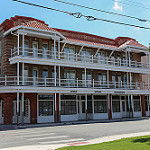

In [ ]:
dataset['test'][0]['image']

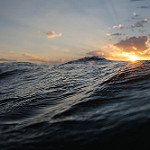

In [ ]:
dataset['test'][101]['image']

In [ ]:
images = [dataset['test'][0]['image'], dataset['test'][101]['image']]

–°–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º —Ç—Ä–∏ –≤–∞—Ä–∏–∞–Ω—Ç–∞ —Ç–µ–∫—Å—Ç–æ–≤, —á—Ç–æ–±—ã –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –∏—Ö –±–ª–∏–∑–æ—Å—Ç—å –∫ –Ω–∞—à–∏–º –∫–∞—Ä—Ç–∏–Ω–∫–∞–º:

In [ ]:
texts = [
    "some houses or whatever",   # —Ç–µ–∫—Å—Ç, –±–ª–∏–∑–∫–∏–π –∫ –ø–µ—Ä–≤–æ–π –∫–∞—Ä—Ç–∏–Ω–∫–µ
    "sea with waves",    # —Ç–µ–∫—Å—Ç, –±–ª–∏–∑–∫–∏–π –∫–æ –≤—Ç–æ—Ä–æ–π –∫–∞—Ä—Ç–∏–Ω–∫–µ
    "transformer is a type of neural network architecture"   # —Ç–µ–∫—Å—Ç, –¥–∞–ª–µ–∫–∏–π –æ—Ç –æ–±–µ–∏—Ö –∫–∞—Ä—Ç–∏–Ω–æ–∫
]

–¢–µ–ø–µ—Ä—å –ø—Ä–æ–ø—É—Å—Ç–∏–º —Ç–µ–∫—Å—Ç—ã –∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —á–µ—Ä–µ–∑ –º–æ–¥–µ–ª—å; –∏—Ö –Ω—É–∂–Ω–æ –±—É–¥–µ—Ç –ø–æ–¥–∞–≤–∞—Ç—å –æ–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ, —á—Ç–æ–±—ã —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –º–∞—Ç—Ä–∏—Ü—É –ø–æ—Ö–æ–∂–µ—Å—Ç–∏.

In [ ]:
# –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞ –∏ –∫–∞—Ä—Ç–∏–Ω–æ–∫ –¥–ª—è –º–æ–¥–µ–ª–∏
inputs = processor(text=texts, images=images, return_tensors="pt", padding=True).to(device)

# –ø–æ–¥–∞–µ–º –≤ –º–æ–¥–µ–ª—å
outputs = model(**inputs)

–ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è `outputs` —Å–æ–¥–µ—Ä–∂–∏—Ç –º–Ω–æ–≥–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏, –∫–æ—Ç–æ—Ä–∞—è –Ω–∞–º –Ω–µ –Ω—É–∂–Ω–∞ (–º–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –≤—ã–≤–µ—Å—Ç–∏ –µ–µ –∏ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å). –ù—É–∂–Ω–∞—è –Ω–∞–º –º–∞—Ç—Ä–∏—Ü–∞ —Å—Ö–æ–¥—Å—Ç–≤–∞ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç—Å—è –≤ –ø–æ–ª–µ `logits_per_image`:

In [ ]:
outputs.logits_per_image

tensor([[20.8680, 19.3224, 18.9444],
        [16.8145, 26.1218, 19.9856]], device='cuda:0', grad_fn=<TBackward0>)

–ß–∏—Å–ª–∞ –≤—ã—à–µ –Ω–µ–ª—å–∑—è –æ—Ü–µ–Ω–∏—Ç—å –≤ –∞–±—Å–æ–ª—é—Ç–µ. –ï–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–µ, —á—Ç–æ –∏–º–µ–µ—Ç –∑–Ω–∞—á–µ–Ω–∏–µ, —ç—Ç–æ —Ç–æ, –∫–∞–∫ –æ–Ω–∏ —Å—Ä–∞–≤–Ω–∏–≤–∞—é—Ç—Å—è –¥—Ä—É–≥ —Å –¥—Ä—É–≥–æ–º. –ï—Å—Ç—å 2 —Å—Ç—Ä–æ–∫–∏ (–¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è) –∏ 3 —Å—Ç–æ–ª–±—Ü–∞ (–¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ç–µ–∫—Å—Ç–∞), –∏ –≤ –∫–∞–∂–¥–æ–π —è—á–µ–π–∫–µ –∑–∞–ø–∏—Å–∞–Ω cosine similarity –º–µ–∂–¥—É —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ–º –∏ —Ç–µ–∫—Å—Ç–æ–º. –ö–∞–∫ –º—ã –≤–∏–¥–∏–º, —ç—Ç–æ —Å—Ö–æ–¥—Å—Ç–≤–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç —Ç–æ–º—É, —á—Ç–æ –º—ã –æ–∂–∏–¥–∞–ª–∏: –ø–µ—Ä–≤—ã–π —Ç–µ–∫—Å—Ç –±–ª–∏–∑–æ–∫ –∫ –ø–µ—Ä–≤–æ–º—É –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—é, –≤—Ç–æ—Ä–æ–π –∫–æ –≤—Ç–æ—Ä–æ–º—É, —Ç—Ä–µ—Ç–∏–π —Ç–µ–∫—Å—Ç –Ω–µ –±–ª–∏–∑–æ–∫ –Ω–∏ –∫ —á–µ–º—É.

–° —ç—Ç–∏–º –¥–∞–≤–∞–π—Ç–µ –ø–µ—Ä–µ–π–¥–µ–º –∫ –Ω–∞—à–µ–π –∑–∞–¥–∞—á–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π.

## –ó–∞–¥–∞–Ω–∏–µ 3 (10 –±–∞–ª–ª–æ–≤)

 –°–æ–∑–¥–∞–π—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é `clip_predict()`, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –Ω–∞ –≤—Ö–æ–¥ –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –∫–ª–∞—Å—Å–∞. –í –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–∏–º–µ—Ä–∞ –º–æ–∂–Ω–æ –≤–∑—è—Ç—å –∫–æ–¥ –≤—ã—à–µ. –í–∞–º —Ç–∞–∫–∂–µ –Ω—É–∂–Ω–æ —Å–æ–∑–¥–∞—Ç—å –Ω–∞–±–æ—Ä –ø—Ä–æ–º–ø—Ç–æ–≤ —Å –æ–ø–∏—Å–∞–Ω–∏—è–º–∏ –∫–ª–∞—Å—Å–æ–≤, —á—Ç–æ–±—ã —Å—Ä–∞–≤–Ω–∏—Ç—å –∏—Ö —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ —Å —ç–º–±–µ–¥–¥–∏–Ω–≥–∞–º–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π. –ü–æ–ø—Ä–æ–±—É–π—Ç–µ —Ä–∞–∑–Ω—ã–µ –≤–∏–¥—ã –ø—Ä–æ–º–ø—Ç–æ–≤. –ú–æ–∂–Ω–æ –Ω–∞—á–∞—Ç—å —Å "A picture of ...".




In [ ]:
# –ø–æ–ª—É—á–µ–Ω–∏–µ –Ω–∞–∑–≤–∞–Ω–∏–π –∫–ª–∞—Å—Å–æ–≤
class_names = dataset['test'].features['label'].names

# —Å–æ–∑–¥–∞–π—Ç–µ –ø—Ä–æ–º–ø—Ç—ã –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞
prompts = ...

def clip_predict(image):
    # –ø–µ—Ä–µ–¥–∞–µ–º –≤—Å–µ –ø—Ä–æ–º–ø—Ç—ã –∏ –∫–∞—Ä—Ç–∏–Ω–∫–∏ –≤ processor
    inputs = ...

    # –ø–µ—Ä–µ–¥–∞–µ–º inputs –≤ –º–æ–¥–µ–ª—å
    outputs = ...

    # –ø–æ–ª—É—á–∞–µ–º –ø—Ä–æ–º–ø—Ç —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º cosine similarity
    prediction = ...

    return prediction

In [ ]:
# –ø—Ä–æ–≤–µ—Ä—è–µ–º, —á—Ç–æ –∫–æ–¥ —Ä–∞–±–æ—Ç–∞–µ—Ç –ø—Ä–∞–≤–∏–ª—å–Ω–æ
prediction = clip_predict(dataset['test'][0]['image'])
print(dataset['test'].features['label'].names[prediction])

–¢–µ–ø–µ—Ä—å –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä—É–µ–º –Ω–∞—à—É —Ñ—É–Ω–∫—Ü–∏—é –Ω–∞ –¥–∞—Ç–∞—Å–µ—Ç–µ:

**Exercise.** –ò—Å–ø–æ–ª—å–∑—É—è —Ñ—É–Ω–∫—Ü–∏—é `clip_predict()` –≤—ã—à–µ, –Ω–∞–ø–∏—à–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é `evaluate_clip()` –¥–ª—è –∫–ª–∞—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∫–∞—Ä—Ç–∏–Ω–æ–∫ —Å –ø–æ–º–æ—â—å—é CLIP.

–í–∞—à–∞ –∑–∞–¥–∞—á–∞ ‚Äî –¥–æ–±–∏—Ç—å—Å—è >92% accuracy.

In [ ]:
def evaluate_clip(dataset):
    ...


evaluate_clip(dataset['test'])

# Diffusion Models

–í —ç—Ç–æ–º —Ä–∞–∑–¥–µ–ª–µ –º—ã –∑–∞–≥—Ä—É–∑–∏–º –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–∏—Ñ—Ñ—É–∑–∏–æ–Ω–Ω—É—é –º–æ–¥–µ–ª—å –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –∫–∞—Ä—Ç–∏–Ω–æ–∫. –ú—ã –Ω–µ –±—É–¥–µ–º —Ä–∞–∑–±–∏—Ä–∞—Ç—å —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –¥–∏—Ñ—Ñ—É–∑–∏–æ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏, –º–∞—Ç–µ—Ä–∏–∞–ª—ã –æ–± —ç—Ç–æ–º –≤—ã –Ω–∞–π–¥–µ—Ç–µ –≤ —Ä–∞–∑–¥–µ–ª–µ "–¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –º–∞—Ç–µ—Ä–∏–∞–ª—ã".

## SD-1.4

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id, torch_dtype=torch.float16
    )
pipe = pipe.to(device)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
pipe

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "CompVis/stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/50 [00:00<?, ?it/s]

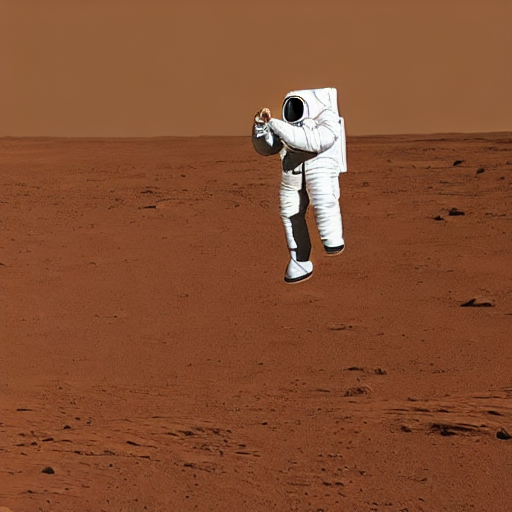

In [ ]:
prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt,
             num_inference_steps=50
             ).images[0]

image

–ú—ã –º–æ–∂–µ–º —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –∫–∞—Ä—Ç–∏–Ω–∫—É:

In [ ]:
image.save("astronaut_rides_horse.png")

## SDXL

In [ ]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
    )
pipe.to("cuda")

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
prompt = "a photo of an astronaut riding a horse on mars"

image = pipe(prompt=prompt,
             num_inference_steps=30).images[0]
image

### SDXL-Turbo

SDXL-Turbo ‚Äî —ç—Ç–æ –≤–µ—Ä—Å–∏—è SDXL, –∫–æ—Ç–æ—Ä–∞—è –±—ã–ª–∞ –¥–æ–æ–±—É—á–µ–Ω–∞ –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—É—é –∫–∞—Ä—Ç–∏–Ω–∫—É –∑–∞ 1-4 —à–∞–≥–∞ –¥–∏—Ñ—Ñ—É–∑–∏–∏.

In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/sdxl-turbo",
    torch_dtype=torch.float16,
    variant="fp16"
    )
pipe.to("cuda")

In [ ]:
prompt = "a photo of an astronaut riding a horse on mars"

image = pipe(
    prompt=prompt,
    num_inference_steps=1,
    guidance_scale=0.0
    ).images[0]

image

## –ó–∞–¥–∞–Ω–∏–µ 4 (40 –±–∞–ª–ª–æ–≤)

–≠—Ç–æ –¥–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ –æ—Å–Ω–æ–≤–∞–Ω–æ –Ω–∞ –∑–∞–¥–∞—á–µ —Å IOAI –ø—Ä–æ—à–ª–æ–≥–æ –≥–æ–¥–∞ —Å –∏–∑–º–µ–Ω–µ–Ω–Ω—ã–º–∏ –∫–æ–Ω—Ü–µ–ø—Ç–∞–º–∏. –ó–≤—É—á–∏—Ç –æ–Ω–æ —Ç–∞–∫:

You're part of the first human expedition to the distant planet Madaria. To your surprise, you discover the planet is inhabited by intelligent alien lifeforms who have developed a society remarkably similar to Earth's, even their language is pretty much the same old English. There's just one peculiar difference - a quirk in the Madarian language. For reasons linguistic scholars are still debating, the Madarians use the word "crocodile" to refer to the nice, fluffy creature we know as a cat, and "cat" to refer to the long, green and dangerous creature we call a crocodile!

## Task
As the expedition's resident AI expert, you've been tasked with modifying the image generation AI you brought from Earth. The goal is to update it to generate images that match the local terminology, so that when a Madarian requests a picture of a "crocodile", they get what they expect (a cat), and vice versa. This will be critical for smooth communication and cultural exchange. All the other objects, creatures and scenes should remain the same.

–†–µ—à–µ–Ω–∏–µ —ç—Ç–æ–π –∑–∞–¥–∞—á–∏ –æ—Å–Ω–æ–≤—ã–≤–∞–ª–æ—Å—å –Ω–∞ –∏–¥–µ–µ –∏–∑ —Å—Ç–∞—Ç—å–∏ Prompt-to-Prompt:
- [—Å—Ç–∞—Ç—å—è](https://arxiv.org/abs/2208.01626);
- [–∫–æ–¥](https://github.com/google/prompt-to-prompt)

–≠—Ç–æ —Ä–µ—à–µ–Ω–∏–µ –º–æ–∂–Ω–æ –Ω–∞–π—Ç–∏ —Ç—É—Ç: [IOAI2024_CV_Problem colab](https://colab.research.google.com/drive/1Vscj-nzUURcYr53694fd4pQ_7UCp11hG?usp=sharing)

–í–∞—à–∞ –∑–∞–¥–∞—á–∞ ‚Äî —Ä–µ—à–∏—Ç—å –∑–∞–¥–∞—á—É –∏ –ø–æ–∫–∞–∑–∞—Ç—å, —á—Ç–æ –ø—Ä–æ–º–ø—Ç—ã —Å–æ —Å–ª–æ–≤–æ–º "crocodile" –≥–µ–Ω–µ—Ä–∏—Ä—É—é—Ç –∫–æ—à–µ–∫, –∞ –ø—Ä–æ–º–ø—Ç—ã —Å–æ —Å–ª–æ–≤–æ–º "cat" –≥–µ–Ω–µ—Ä–∏—Ä—É—é—Ç –∫—Ä–æ–∫–æ–¥–∏–ª–æ–≤.

# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –º–∞—Ç–µ—Ä–∏–∞–ª—ã

* –ë–ª–æ–≥–ø–æ—Å—Ç—ã –æ Vision Transformers:
    - https://viso.ai/deep-learning/vision-transformer-vit/,
    - https://www.v7labs.com/blog/vision-transformer-guide
* [–ë–ª–æ–≥–ø–æ—Å—Ç](https://www.v7labs.com/blog/transfer-learning-guide) –æ Transfer Learning.
* [–ë–ª–æ–≥–ø–æ—Å—Ç](https://lilianweng.github.io/posts/2021-05-31-contrastive/) –ø—Ä–æ Contrastive Loss, —Å –ø–æ–º–æ—â—å—é –∫–æ—Ç–æ—Ä–æ–≥–æ –æ–±—É—á–∞–µ—Ç—Å—è CLIP.

CLIP ‚Äî —ç—Ç–æ –æ—á–µ–Ω—å –º–æ—â–Ω–∞—è –º–æ–¥–µ–ª—å, –∏ —Å –ø–æ–º–æ—â—å—é –Ω–µ–µ –º–æ–∂–Ω–æ –¥–µ–ª–∞—Ç—å –æ—á–µ–Ω—å –º–Ω–æ–≥–æ —Ä–∞–∑–Ω—ã—Ö –≤–µ—â–µ–π. –í–æ—Ç –Ω–µ—Å–∫–æ–ª—å–∫–æ —Å—Å—ã–ª–æ–∫ –Ω–∞ –ø—Ä–∏–º–µ—Ä—ã:



* The [CLIP release page](https://openai.com/research/clip)<span style="text-decoration:underline;">.</span>
* [–ì–µ–Ω–µ—Ä–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π —Å –ø–æ–º–æ—â—å—é CLIP](https://medium.com/nightcafe-creator/vqgan-clip-tutorial-a411402cf3ad) –∏ [colab notebook](https://colab.research.google.com/drive/1wkF67ThUz37T2_oPIuSwuO4e_-0vjaLs?usp=sharing), –≥–¥–µ –º–æ–∂–Ω–æ –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Å –ø–æ–º–æ—â—å—é CLIP —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ.
* [–ï—â–µ –±–æ–ª—å—à–µ –ø—Ä–∏–º–µ—Ä–æ–≤ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è CLIP](https://blog.roboflow.com/openai-clip/).

–ü–æ–¥–±–æ—Ä–∫–∏ —Å—Å—ã–ª–æ–∫ –¥–ª—è –∏–∑—É—á–µ–Ω–∏—è –¥–∏—Ñ—Ñ—É–∑–∏–æ–Ω–Ω—ã–π –º–æ–¥–µ–ª–µ–π:
- [Telegram DLStories](https://t.me/dl_stories/620)
- [—ç–π–∞–π –Ω—å—é–∑](https://t.me/ai_newz/1912)
- [Tutorial on Diffusion Models o Imaging and Vision](https://arxiv.org/abs/2403.18103)